In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Load Dataset

In [59]:
file=pd.read_csv(r"C:\internships\oasisinfobyte\Task 3\car data.csv")
file.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [60]:
file.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [61]:
file.size

2709

In [62]:
file.shape

(301, 9)

# Data Cleaning and Manpulation

In [63]:
file.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [64]:
file[file.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [65]:
file.duplicated().sum()

2

In [66]:
file=file.drop_duplicates()

In [67]:
file.size

2691

In [68]:
file.shape

(299, 9)

In [69]:
file.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

# adding graph and subplot for better understanding

<AxesSubplot:>

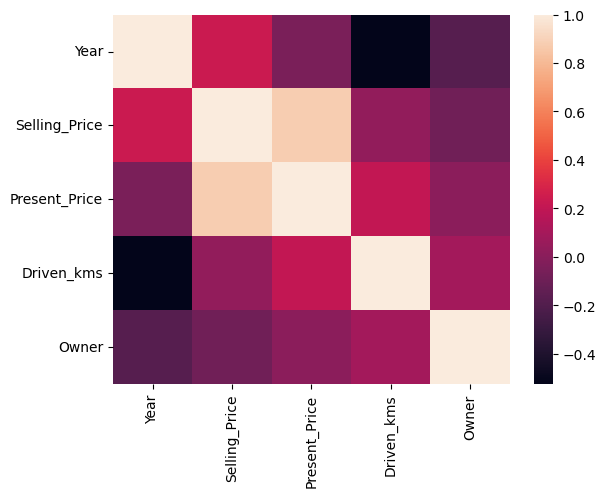

In [70]:
sns.heatmap(file.corr())

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

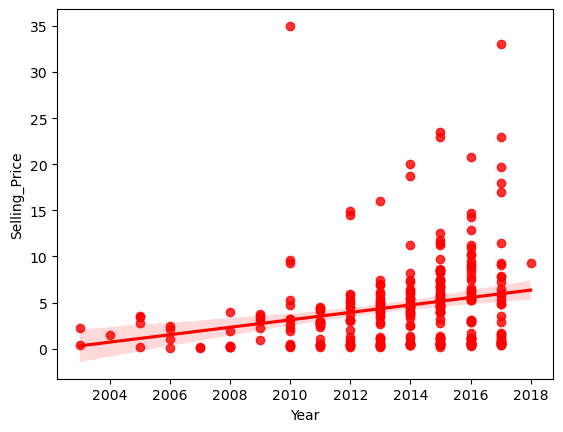

In [71]:
sns.regplot(x=file['Year'],y=file['Selling_Price'],color='red')

In [79]:
from sklearn.preprocessing  import LabelEncoder
label=LabelEncoder()
file['Car_Name']=label.fit_transform(file['Car_Name'])
file['Fuel_Type']=label.fit_transform(file['Fuel_Type'])
file['Selling_type']=label.fit_transform(file['Selling_type'])
file['Transmission']=label.fit_transform(file['Transmission'])
#changing categorial values to sum numerical values for better understaning

In [78]:
file['Car_Name']

0      90
1      93
2      68
3      96
4      92
       ..
296    69
297    66
298    69
299    69
300    66
Name: Car_Name, Length: 299, dtype: int32

In [80]:
file.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [110]:
drop_sellprice=file.drop(['Selling_Price'],axis=1)
xdata=drop_sellprice
xdata

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,2016,11.60,33988,1,0,1,0
297,66,2015,5.90,60000,2,0,1,0
298,69,2009,11.00,87934,2,0,1,0
299,69,2017,12.50,9000,1,0,1,0


In [88]:
y=file['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [91]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(xdata)

StandardScaler()

In [92]:
from sklearn.model_selection import train_test_split
xdata_train,xdata_test,y_train,y_test=train_test_split(xdata,y,test_size=0.30,random_state=42)

In [93]:
xdata_train

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
226,82,2015,5.70,24678,2,0,1,0
69,71,2016,20.91,12000,2,0,1,0
224,94,2013,9.40,36198,2,0,0,0
38,63,2016,3.76,10079,2,0,1,0
16,76,2015,10.79,41678,1,0,1,0
...,...,...,...,...,...,...,...,...
190,14,2008,0.75,60000,2,1,1,0
72,71,2013,18.61,56001,2,0,1,0
108,48,2016,1.50,18000,2,1,1,0
272,69,2015,10.00,27600,2,0,1,0


In [94]:
y_train

226     5.25
69     14.25
224     5.11
38      3.00
16      7.25
       ...  
190     0.20
72      7.45
108     1.20
272     7.50
104     1.35
Name: Selling_Price, Length: 209, dtype: float64

In [95]:
xdata_test

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
283,69,2016,11.80,9010,2,0,1,0
267,69,2016,9.40,19434,1,0,1,0
166,25,2016,0.55,1000,2,1,1,0
9,68,2015,8.92,42367,1,0,1,0
78,71,2010,22.83,80000,2,0,0,0
...,...,...,...,...,...,...,...,...
134,51,2017,0.81,11800,2,1,1,0
73,80,2011,5.71,43000,2,0,1,0
15,76,2016,10.79,43000,1,0,1,0
10,62,2017,3.60,2135,2,0,1,0


In [96]:
y_test

283    8.99
267    8.35
166    0.45
9      7.45
78     5.25
       ... 
134    0.65
73     2.65
15     7.75
10     2.85
159    0.45
Name: Selling_Price, Length: 90, dtype: float64

In [97]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xdata_train,y_train)

LinearRegression()

In [98]:
y_predict=lr.predict(xdata_test)
y_predict


array([ 7.46472652,  7.35416662,  1.25687554,  6.58460671, 11.49812624,
        4.45681814,  8.52917997,  1.80011183,  8.60753275, -1.04917964,
        9.97092816, -1.01563953,  1.12511597,  1.70738507,  5.22149389,
        5.10468048,  1.1352747 ,  1.89633326, 21.57342197,  1.06042601,
        1.14013752,  2.66768991,  5.67662647,  0.39821796,  5.87556941,
        7.79626854,  8.29343849,  1.27043572,  5.00630725,  5.13159295,
        6.24078196,  5.90401091,  5.88261257,  2.855591  ,  3.0791058 ,
        6.72499313,  1.3471881 , -4.33722008,  1.48469076, 10.70836818,
        7.14735028,  8.77010448,  1.45800655,  4.33169273,  1.1594846 ,
       -2.2208542 ,  8.15702793,  4.27505328,  6.03113947, -0.68354276,
        0.5053941 ,  0.04829097, 11.46881952,  9.07432965,  7.28733832,
        5.95542139,  3.78545084,  3.61113087,  9.20180459,  9.16139257,
        5.40921742,  0.60385162,  0.02320464, -1.11397778,  2.4858576 ,
        2.73870815,  7.88867714,  8.01056321,  2.7748664 ,  6.75

In [101]:
list(zip(xdata,lr.coef_))

[('Car_Name', 0.008511118355602386),
 ('Year', 0.3432714919266765),
 ('Present_Price', 0.43895704422983106),
 ('Driven_kms', -9.029691784386543e-06),
 ('Fuel_Type', -1.0370625191127534),
 ('Selling_type', -0.9674228500684571),
 ('Transmission', -1.8753280631240843),
 ('Owner', 0.8366753715721853)]

In [102]:
print("Constant is :",lr.intercept_)

Constant is : -686.3067508714126


In [103]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [105]:
print("Minimum Absoulute Error :",mean_absolute_error(y_test,y_predict))
print("MInimum Absoulute Percentage Error :", mean_absolute_percentage_error(y_test,y_predict))
print("Mean Squared Error :",mean_squared_error(y_test,y_predict))

Minimum Absoulute Error : 1.4586612385558018
MInimum Absoulute Percentage Error : 1.3919294014416828
Mean Squared Error : 5.605534605184646


In [107]:
x=mean_squared_error(y_test,y_predict)
rmse=np.sqrt(x)
print(rmse)

2.3676010232268117


In [111]:
print('r2_score=',r2_score(y_test,y_predict))

r2_score= 0.7589059878095539
